Group 3
1. Tonny Kawuki
2. Sentongo Paul
3. Diana Nakimbugwe Kirabo
4. Alex Kibuuka
5. Jacob


In [2]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset
data = pd.read_excel("Group Exercise_Predictive Modelling.xlsx")
#dropping the 1st row in the dataset
#manually deleting the comment from the dataset before loading
data.head()

,Student,Age,Gender,Discipline
0,1,23,male,IT
1,2,22,male,IT
2,3,30,male,IT
3,4,31,female,COMP
4,5,33,female,COMP


We confirm that the data was sucessfully loaded.

In [4]:
#check the shape of the dataset and describing the continuos variables
data.describe(include='all')

,Student,Age,Gender,Discipline
count,40.000000,40.000000,40,40
unique,NaN,NaN,2,7
top,NaN,NaN,male,IT
freq,NaN,NaN,29,11
mean,20.500000,26.600000,NaN,NaN
std,11.690452,3.264416,NaN,NaN
min,1.000000,22.000000,NaN,NaN
25%,10.750000,24.750000,NaN,NaN
50%,20.500000,26.000000,NaN,NaN
75%,30.250000,29.000000,NaN,NaN


From the description above, we note that age has 40 values with a mean age of 26.6 years with a maximum age of 33 years and a minimum age of 22 years old. the description also shows that Gender and Discipline as categorical variables with 7 unique values under discipline.

In [5]:
# checking for missing Values
data.isnull().sum()

Student       0
Age           0
Gender        0
Discipline    0
dtype: int64

From the results we note no missing values in the dataset

In [6]:
# checking for duplicates
data.duplicated().sum()


0

From the results we note that the dataset doesnt contain any duplicates.

In [7]:
#Droping the last row since it has a null value
data.drop(data.tail(1).index,inplace=True)
data.tail()

,Student,Age,Gender,Discipline
34,35,26,male,IT
35,36,23,female,COMP
36,37,22,female,STATS
37,38,30,male,COMP
38,39,31,female,BA


After dropping the last row for which prediction will be done, we preview the dataset to check if the data looks normal.

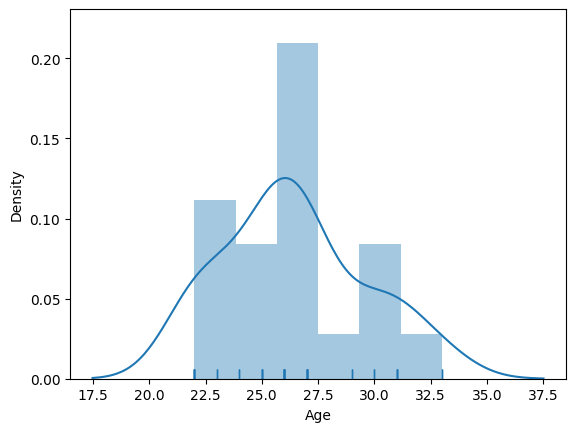

In [8]:
# visualizing the distribution of the data
sns.distplot(data['Age'], kde=True, rug=True)
plt.show()

The visual display indicates that Ahe may be normally distributed due to the peak in the middle, however one needs to confirm this with statistical tests.

<Axes: xlabel='Gender'>

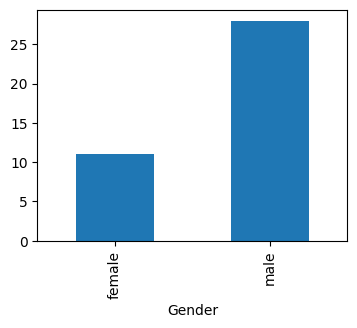

In [9]:
#checking for the distribution of  categorical variables
#Plot bar charts for all categorical variables
import matplotlib.pyplot as plt
# Creating Bar chart as the Target variable is Categorical
GroupedData=data.groupby('Gender').size()
GroupedData.plot(kind='bar', figsize=(4,3))




From the distribution of gender, we note that we have more males than females in the dataset

In [10]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=data['Gender'], columns=data['Discipline'])
CrossTabResult

Discipline,AGRIC,BA,COMP,IT,MED,STATS
Gender,,,,,,
female,0,1,6,2,1,1
male,3,7,4,9,2,3


We observe that most females are undertaking COMP and no females undertook AGRIC while the males are predominant in IT and BA.

In [12]:
# Treating the Target variable
data['Discipline'].replace({'AGRIC':1, 'BA':2, 'COMP':3, 'IT':4, 'MED':5, 'STATS':6}, inplace=True)


# Looking at data after treatment
data.head()

,Student,Age,Gender,Discipline
0,1,23,male,4
1,2,22,male,4
2,3,30,male,4
3,4,31,female,3
4,5,33,female,3


After coding the predictor variable we check the data set to ensure that we were succesful.

In [13]:
data['Gender'].replace(['male','female'],[0,1],inplace=True)
data.head()

,Student,Age,Gender,Discipline
0,1,23,0,4
1,2,22,0,4
2,3,30,0,4
3,4,31,1,3
4,5,33,1,3


From the result above the code was succcesful in coding the variable gender to assess the relationship between Age and Gender Vs the Discipline

In [14]:
#ANOVA is used to compare the means of more than 2 groups
#H0: There is no significant difference in the means of the groups
#H1: There is a significant difference in the means of the groups
#We will use the 5% significance level
#If p-value is less than 0.05, we reject the null hypothesis
#If p-value is greater than 0.05, we fail to reject the null hypothesis
#Import the f_oneway function from the scipy.stats library
# age vs dsipline
from scipy.stats import f_oneway
F, p = f_oneway(data['Age'], data['Discipline'])
print('F Statistic:', F, '\np-value:', p)




F Statistic: 1762.403190634688 
p-value: 2.4615015012036573e-54


From the results above we note that the mean age difference  across th different disciplines is significant since the P value is less than 0.05. This indicates that we can use Age in te model.

In [24]:
#Chi-Square test to check the correlation between gender and discipline
from scipy.stats import chi2_contingency
CrossTabResult=pd.crosstab(index=data['Discipline'], columns=data['Gender'])
CrossTabResult
ChiSqResult = chi2_contingency(CrossTabResult)
ChiSqResult

Chi2ContingencyResult(statistic=7.750213990554899, pvalue=0.17054974916800378, dof=5, expected_freq=array([[2.15384615, 0.84615385],
       [5.74358974, 2.25641026],
       [7.17948718, 2.82051282],
       [7.8974359 , 3.1025641 ],
       [2.15384615, 0.84615385],
       [2.87179487, 1.12820513]]))

The result indicates that we can not reject Ho: there is no difference across the disciplines due to gender since the P value is greater than 0.05. This indicates we could consider not using Gender in the model.

             Student       Age    Gender  Discipline
Student     1.000000 -0.094221  0.182262    0.061516
Age        -0.094221  1.000000  0.206289   -0.311593
Gender      0.182262  0.206289  1.000000    0.073569
Discipline  0.061516 -0.311593  0.073569    1.000000


<Axes: >

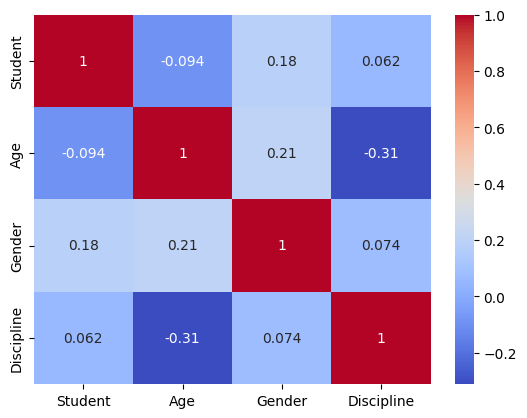

In [25]:
#visualising the corelation
# Computing the correlation matrix
corr_matrix = data.corr()

# Printing the correlation matrix
print(corr_matrix)

# Creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

From the above heat matrix we note that gender has a weak positiverelation ship with Discipline while Age has a moderate negative relationship with Discipline.

In [31]:
# Generate the predictor input
# Droping the target variable and the student column
X = data.drop(columns=['Student','Discipline'])
X

,Age,Gender
0,23,0
1,22,0
2,30,0
3,31,1
4,33,1
5,26,0
6,27,0
7,27,0
8,29,0
9,22,1


We drop all the variables student colunm and the traget variable as create our X dataset for the model.

In [27]:
# Generate the target output
y = data['Discipline']
y

0     4
1     4
2     4
3     3
4     3
5     2
6     2
7     1
8     5
9     5
10    5
11    2
12    2
13    2
14    4
15    4
16    6
17    4
18    6
19    3
20    3
21    3
22    1
23    2
24    2
25    1
26    4
27    4
28    3
29    3
30    3
31    4
32    4
33    6
34    4
35    3
36    6
37    3
38    2
Name: Discipline, dtype: int64

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       1.00      0.33      0.50         3
           4       0.20      1.00      0.33         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.25         8
   macro avg       0.20      0.22      0.14         8
weighted avg       0.40      0.25      0.23         8

[[0 1 0 1 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]
Accuracy of the model on Testing Sample Data: 0.23

Accuracy values for 10-fold Cross Validation:
 [0.66666667 0.16666667 0.125      0.375      0.         0.375
 0.125      0.33333333 0.125      0.        ]

Final Average Accuracy of the model: 0.23


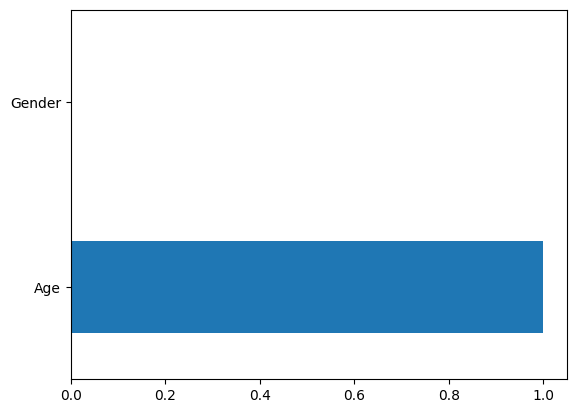

In [32]:
#Decision Trees
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

#choose from different tunable hyper parameters
model = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(model)

# Creating the model on Training Data
DTree=model.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
import matplotlib.pyplot as plt
feature_importances = pd.Series(DTree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

from the model run we note that our model is 23% accurate at predicting the discipline of the student. this could be due to the few data points as Supervised learning Models need alot of training data for btter accuracy.

In [34]:
# make predictions
prediction = model.predict([[33,0]])
prediction

array([3], dtype=int64)

#from the model, we predict that a 33 year old male will attend COMP course.

In [35]:
# Save model
#Or save as pickle 

import joblib
joblib.dump(model, 'Disp.joblib')

['Disp.joblib']

We save the model in a joblib.

In [128]:
# Generating .dot file
#Decision tree

from sklearn import tree
tree.export_graphviz(model,out_file='Disp.dot',
                     feature_names=['Age','Gender'],
                     class_names=['IT','COMP','BA','AGRIC','MED','STATS'],
                     filled=True)

[Text(0.5, 0.8333333333333334, 'x[0] <= 26.5\nentropy = 2.257\nsamples = 31\nvalue = [10, 7, 8, 1, 2, 3]'),
 Text(0.25, 0.5, 'x[0] <= 24.5\nentropy = 1.999\nsamples = 17\nvalue = [8, 2, 3, 0, 1, 3]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.75\nsamples = 8\nvalue = [4, 1, 0, 0, 1, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.753\nsamples = 9\nvalue = [4, 1, 3, 0, 0, 1]'),
 Text(0.75, 0.5, 'x[0] <= 29.5\nentropy = 2.006\nsamples = 14\nvalue = [2, 5, 5, 1, 1, 0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.664\nsamples = 7\nvalue = [0, 1, 4, 1, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.379\nsamples = 7\nvalue = [2, 4, 1, 0, 0, 0]')]

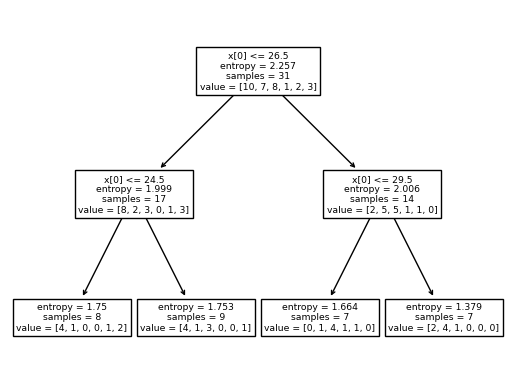

In [129]:
# Generate tree
tree.plot_tree(model)

Since the model accuracy is so low we try to use other models to identify a better model for our predictions

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.25         8
   macro avg       0.17      0.11      0.13         8
weighted avg       0.38      0.25      0.30         8

[[0 1 0 1 0 0]
 [0 0 0 0 0 0]
 [0 1 2 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]]
Accuracy of the model on Testing Sample Data: 0.3

Accuracy values for 10-fold Cross Validation:
 [0.25       0.16666667 0.125      0.16666667 0.1        0.16666667
 0.125      0.66666667 0.125      0.        ]

Final Average Accuracy of the model: 0.19


<Axes: >

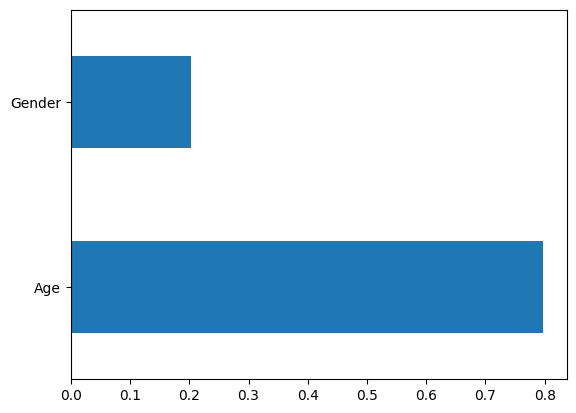

In [36]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(model2)

# Creating the model on Training Data
RF=model2.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
import matplotlib_inline
feature_importances = pd.Series(RF.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

The forest model is produces a worse accuracy score of 19%. This means that we shall use Model 1 that has an accuracy score of 23%